# Análise de Dados com Linguagem Python

### Descrição do Projeto

Nesse projeto irei práticar algumas técnicas de pré-processamento de dados de texto. A base de dados, será carregada via comamdos python para dentro de um data lake local (a ferramenta usada para criação desse data lake foi o MongoDB) e em seguida, será carregada para o projeto.

In [1]:
# carregando os pacotes necessários

import json #para manipulação de arquivos json
import pymongo #pacote que permite acessar o mongoDB a partir da linguagem python
import numpy as np #para manipualação de dados
import pandas as pd #para manipulação de dados
import matplotlib.pyplot as plt #criação de graficos
import seaborn as sns #criação de graficos
import warnings #ignorar warnings
warnings.filterwarnings('ignore')

In [2]:
# conectando ao Data Lake (mongoDB)
# abrindo a conexão

cliente = pymongo.MongoClient('mongodb://localhost:27017/')

In [3]:
# visualizando a conexão
cliente

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [4]:
# criando um repositório (banco de dados) chamado datalake
datalake = cliente['datalake']

# o nome datalake que está entre aspas é o nome do db que será criado dentro do mongoDB e o nome que está
# esquerda do sinal de igual é o nome da variável que aponta para esse banco. 

In [5]:
# confirmando a criação do banco dentro do mongoDB
datalake

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'datalake')

In [6]:
# apagando qualquer coleção que já exista no banco com o nome posts

datalake.posts.drop()

In [7]:
# criando coleção com o nome posts

posts = datalake['posts']

## Carregando os dados para dentro do data lake

In [8]:
# carregando o arquivo json para dentro de uma variável

with open ('dados/dataset.json') as file:
    file_data = json.load(file)

In [9]:
# jogando para dentro da coleção posts (que está dentro do mongoDB), o arquivo json que foi carregado
# para uma variável python. Cada item do arquivo srá um documento.

posts.insert_many(file_data, ordered = False, bypass_document_validation = True)

In [10]:
# retornando apenas um único item contido dentro da coleção posts

posts.find_one()

{'_id': ObjectId('63d715352be87d106e4b8974'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [11]:
# extraindo a quantidade de documentos (posts) que possuem em nosso datalake
# e salvando dentro de uma variável python

documentos = posts.estimated_document_count()

In [12]:
# verificando a quantidade de documentos contidos na variável python

documentos

2000

Pré-Processamento e Análise dos dados

In [13]:
# Para saber a quantidade de posts por categoria, terei que fazer uma agregação

posts_categoria = posts.aggregate([{'$group': {'_id': '$Category', 'count': {'$sum': 1}}},
                                   {'$sort': {'_id.Category': 1, 'count': -1}}])

In [14]:
# Verificando se o objeto foi criado
print(posts_categoria)

In [15]:
# Para visualizar o valor da agregação, irei converter essa variável em um dataframe

dfpostsCat_agre = pd.DataFrame(list(posts_categoria))

In [16]:
dfpostsCat_agre.head()

,_id,count
0,arts,311
1,fashion,300
2,lifestyle,294
3,movies,289
4,politics,274


<AxesSubplot:ylabel='count'>

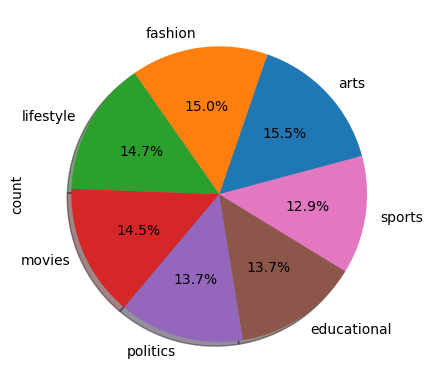

In [17]:
# grafico de pizza com participação de cada categoria pelo nº de posts

dfpostsCat_agre.plot.pie(y = 'count',
                        labels = dfpostsCat_agre['_id'],
                        autopct = '%1.1f%%',
                        startangle = 15,
                        shadow = True,
                        legend = False)

In [18]:
# Para saber a qtde de posts públicos e privados pela categoria politics, terei que fazer uma agregação
# nesse caso, como estou especificando qual a categoria que quero, portanto, terei que filtrar a categoria
# logo depois fazer a agregação por status (público e privado)

postsPolitics_cat = posts.aggregate([{'$match': {'Category': 'politics'}},
                                   {'$group': {'_id': '$status', 'count': {'$sum': 1}}}])

In [19]:
# Para visualizar o valor da agregação, irei converter essa variável em um dataframe

dfpostsPol_agre = pd.DataFrame(list(postsPolitics_cat))

In [20]:
dfpostsPol_agre.head()

,_id,count
0,private,148
1,public,126


<AxesSubplot:title={'center':'Qtde de posts Públicos e Privados'}, xlabel='_id'>

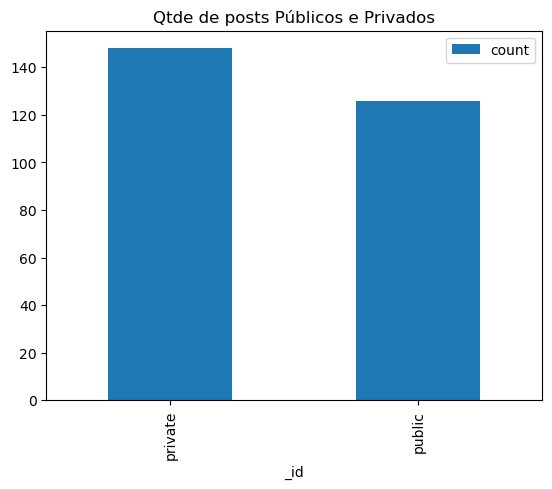

In [21]:
dfpostsPol_agre.plot.bar(x = '_id',
                        y = 'count',
                        title = 'Qtde de posts Públicos e Privados')

In [22]:
# Verificando novamante um documento
posts.find_one()

{'_id': ObjectId('63d715352be87d106e4b8974'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False}

In [23]:
datalake.posts.update_many({}, {'$set': {'hour': 0}});
datalake.posts.update_many({}, {'$set': {'year': 0}});

In [24]:
# Verificando e as novas variáveis foram criadas em nosso documento

posts.find_one()

{'_id': ObjectId('63d715352be87d106e4b8974'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': 0,
 'year': 0}

In [25]:
# Vou criar um interação para varear todo os documentos
for doc in posts.find({}):
    posts.update_one({'_id': doc['_id']},
                     {'$set': {'hour': doc['creationDate'].split('T')[1].split(':')[0],
                               'year': doc['creationDate'].split('T')[0].split('-')[0]}})

In [26]:
# Verificando e as novas variáveis "pegaram as strings cortadas"

posts.find_one()

{'_id': ObjectId('63d715352be87d106e4b8974'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': '20',
 'year': '2017'}

In [27]:
# Agregandos os posts por ano

posts_year = posts.aggregate([{'$group': {'_id': '$year', 'count': {'$sum': 1}}},
                              {'$sort': {'_id.year': 1, 'count': 1}}])

In [28]:
dfposts_year = pd.DataFrame(list(posts_year))

dfposts_year

,_id,count
0,2015,76
1,2016,299
2,2019,303
3,2017,309
4,2021,330
5,2020,334
6,2018,349


<AxesSubplot:title={'center':'Nº de posts por ano'}, xlabel='_id'>

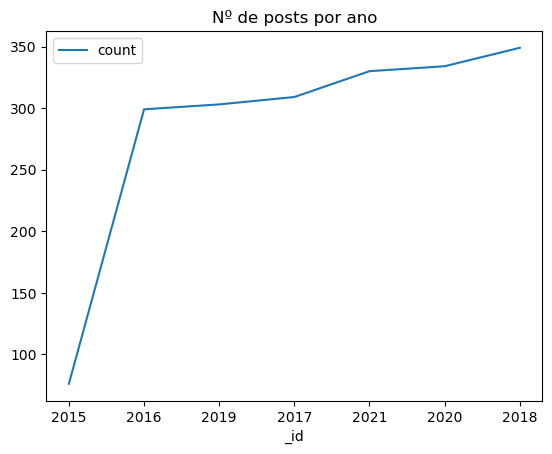

In [29]:
dfposts_year.plot.line(x = '_id',
                       y = 'count',
                       title = 'Nº de posts por ano')

In [30]:
comentarios = posts.count_documents({'allowComments': True})

In [31]:
print('Nº de posts que permitem comentários:', comentarios)

Nº de posts que permitem comentários: 964


In [32]:
Ncomentarios = posts.count_documents({'allowComments': False})

In [33]:
print('Nº de posts que não permitem comentários:', Ncomentarios)

Nº de posts que não permitem comentários: 1036


Text(0, 0.5, 'Nº de posts')

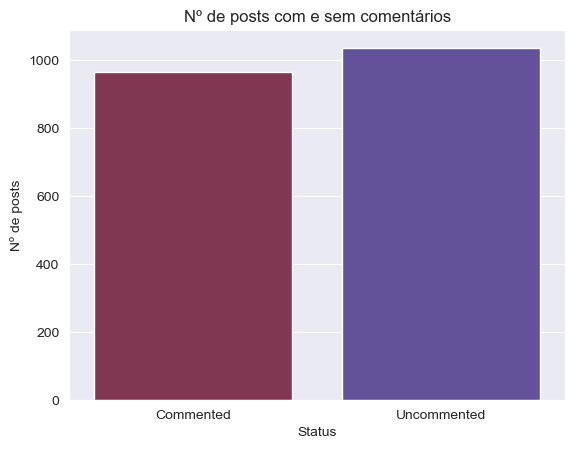

In [34]:
sns.set_style('darkgrid')
x = ['Commented', 'Uncommented']
y = [comentarios, Ncomentarios]
sns.barplot(x, y, palette = 'twilight_r')
plt.title('Nº de posts com e sem comentários')
plt.xlabel('Status')
plt.ylabel('Nº de posts')

In [35]:
posts.find_one()

{'_id': ObjectId('63d715352be87d106e4b8974'),
 'status': 'public',
 'creationDate': '2017-07-17T20:05:49Z',
 'allowComments': True,
 'title': 'ligula nec sem duis aliquam',
 'description': 'in felis eu sapien cursus vestibulum proin eu mi nulla ac enim in tempor turpis nec euismod scelerisque quam turpis adipiscing lorem vitae mattis nibh ligula nec sem duis aliquam convallis nunc proin at turpis a pede posuere nonummy integer non velit donec diam neque vestibulum eget vulputate ut ultrices vel augue vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae donec pharetra magna vestibulum aliquet ultrices erat tortor sollicitudin mi sit amet lobortis sapien sapien non mi integer ac neque duis bibendum morbi non',
 'tags': 1,
 'Category': 'lifestyle',
 'filteredPicture': False,
 'hour': '20',
 'year': '2017'}

In [36]:
# criando um nova coluna no documento, essa coluna irá armazenar o tamanho dos posts

datalake.posts.update_many({}, {'$set': {'lenght_of_heading': 0}});

In [37]:
# iteração que vai varrer todo o documento, pegar o tamanho do titulo e salvar na coluna criada

for doc in posts.find({}):
    posts.update_one({'_id': doc['_id']},
                     {'$set': {'lenght_of_heading': len(doc['title'].split(' '))}})

In [38]:
# agrupando e ordenando

tamanho_title = posts.aggregate([{'$group': {'_id': '$lenght_of_heading', 'count': {'$sum': 1}}},
                                 {'$sort': {'_id.lenght_of_heading': 1, 'count': -1}}])

In [39]:
tamanho_title

In [40]:
dftamanho_title = pd.DataFrame(list(tamanho_title))

In [41]:
dftamanho_title.head(10)

,_id,count
0,3,355
1,4,345
2,1,343
3,5,337
4,6,336
5,2,284


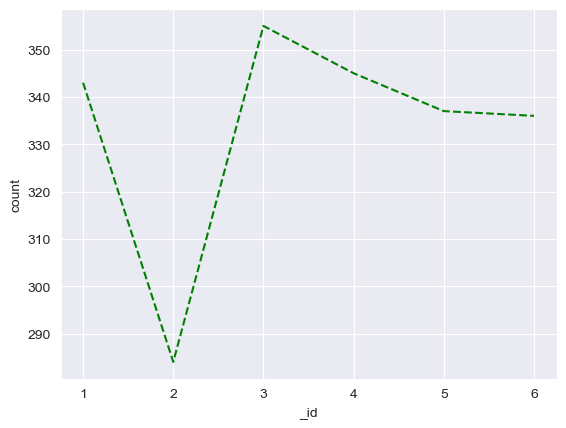

In [42]:
ax = sns.lineplot(x = '_id', y = 'count', data = dftamanho_title, color = 'green')
ax.lines[0].set_linestyle('--')
plt.show()

In [43]:
# Criando uma coluna no documento para armazenar o tamanho do posts

datalake.posts.update_many({}, {'$set': {'length_of_desc': 0}});

In [44]:
# iteração para varrer todo o documento

for doc in posts.find({}):
    posts.update_one({'_id': doc['_id']}, {'$set': {'length_of_desc': len(doc['description'].split(' '))}})

In [46]:
# agregando por categoria

cat_desc = posts.aggregate([{'$match': {'length_of_desc': {'$gte': 60}}},
                            {'$group': {'_id': '$Category', 'count': {'$sum': 1}}}])

In [47]:
for i in range(7):
    print(cat_desc.next())

{'_id': 'politics', 'count': 146}
{'_id': 'lifestyle', 'count': 156}
{'_id': 'fashion', 'count': 161}
{'_id': 'sports', 'count': 130}
{'_id': 'arts', 'count': 178}
{'_id': 'movies', 'count': 159}
{'_id': 'educational', 'count': 156}
